### Ejemplo de análisis de datos.


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
##
## Lectura de datos
##
papers = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/scopus-papers.csv",
    sep=",",  # separador de campos
    thousands=None,  # separador de miles para números
    decimal=".",  # separador de los decimales para números
    encoding="latin-1",
)  # idioma
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ï»¿Authors                 1902 non-null   object 
 1   Author(s) ID               1902 non-null   object 
 2   Title                      1902 non-null   object 
 3   Year                       1902 non-null   int64  
 4   Source title               1902 non-null   object 
 5   Volume                     1860 non-null   float64
 6   Issue                      1456 non-null   object 
 7   Art. No.                   531 non-null    object 
 8   Page start                 1411 non-null   object 
 9   Page end                   1411 non-null   object 
 10  Page count                 2 non-null      float64
 11  Cited by                   1257 non-null   float64
 12  DOI                        1825 non-null   object 
 13  Link                       1902 non-null   objec

### Nombre de las revistas

In [3]:
papers["Source title"].drop_duplicates().sort_values(ascending=True)

123                           Applied Marketing Analytics
74                                               Big Data
57                                      Big Data Research
744                                              Big data
111                                  Data Science Journal
82                           Data Science and Engineering
0                                        EPJ Data Science
1901    Easy Care in Wool; Woolmark Business Intellige...
88      Environment and Planning B: Urban Analytics an...
65            International Journal of Business Analytics
417     International Journal of Business Intelligence...
147     International Journal of Business Intelligence...
17                                    Journal of Big Data
61                        Journal of Management Analytics
70                         Journal of Marketing Analytics
1900    World Wool Supply to 2005; Woolmark Business I...
Name: Source title, dtype: object

In [4]:
##
## Cantidad de revistas
##
papers["Source title"].drop_duplicates().count()

16

## Cantidad de citas por año por revista

In [5]:
df = (papers.groupby(["Source title"]).sum()[["Cited by"]].sort_values("Cited by", ascending = False))

In [10]:
df

,Cited by
Source title,
Journal of Big Data,2312.0
EPJ Data Science,1902.0
Data Science Journal,1468.0
International Journal of Business Intelligence and Data Mining,1420.0
Big Data,1164.0
Big Data Research,926.0
Journal of Management Analytics,440.0
Environment and Planning B: Urban Analytics and City Science,370.0
Journal of Marketing Analytics,253.0


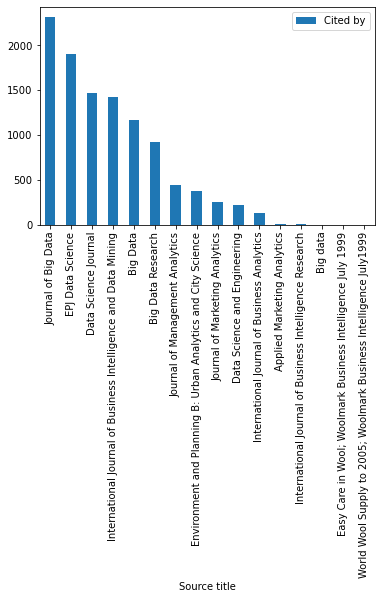

In [11]:
##
## Gráfico por defecto usando Matplotlib
##
df.plot.bar()

,Cited by
Source title,
Journal of Big Data,2312.0
EPJ Data Science,1902.0
Data Science Journal,1468.0
International Journal of Business Intelligence and Data Mining,1420.0
Big Data,1164.0
Big Data Research,926.0
Journal of Management Analytics,440.0
Environment and Planning B: Urban Analytics and City Science,370.0
Journal of Marketing Analytics,253.0


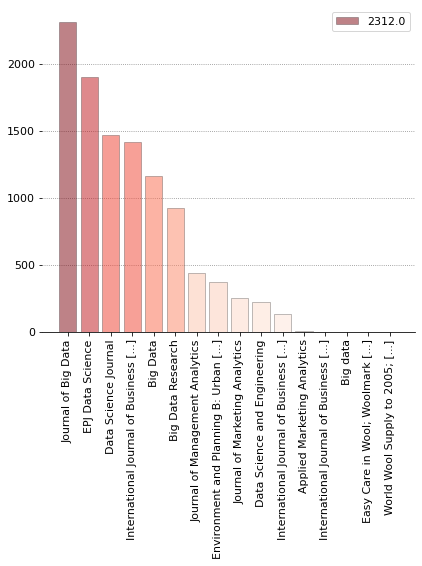

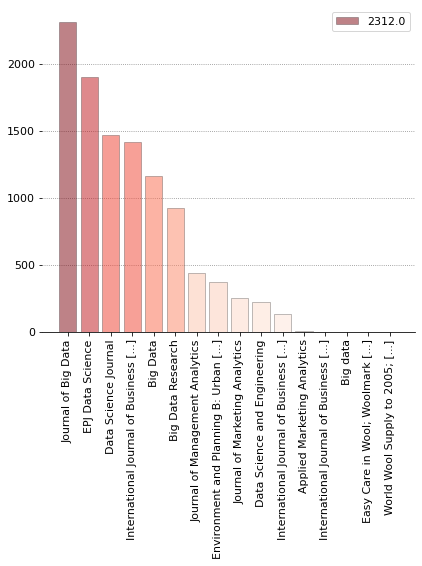

In [106]:
## Personalización

import textwrap

TEXTLEN = 40

def bar(
    height,
    darkness = None,
    cmap = "Greys",
    figsize = (6, 6),
    fontsize = 11,
    edgecolor = "k",
    linewidth = 0.5,
    zorder = 10,
    ylabel = None,
    **kwargs,
):
    darkness = height if darkness is None else darkness
    
    cmap = plt.cm.get_cmap(cmap)
    kwargs["color"] = [
        cmap(0.05 + 0.90 * (d - min(darkness)) / (max(darkness))) for d in darkness
    ]
    
    matplotlib.rc("font", size = fontsize)
    fig = plt.figure(figsize = figsize)
    ax = fig.subplots()
    
    ax.bar(
        x = range(len(height)),
        height = height,
        edgecolor = edgecolor,
        linewidth = linewidth,
        zorder = zorder,
        alpha = 0.5,
        **kwargs,)
    
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    
    xticklabels = height.index
    if xticklabels.dtype != "int64":
        xticklabels = [
            textwrap.shorten(text = text, width = TEXTLEN) for text in xticklabels
        ]
    
    ax.set_xticks(np.arange(len(height)))
    ax.set_xticklabels(xticklabels)
    ax.tick_params(axis = "x", labelrotation = 90)
    plt.legend(height)
    
    
    for x in ["top", "right", "left", "bottom"]:
        if x != "bottom":
            ax.spines[x].set_visible(False)
    
    ax.grid(axis = "y", color = "gray", linestyle = ":")
    
    fig.set_tight_layout(True)
    
    return fig

bar(height = df["Cited by"], cmap = "Reds", figsize = (6, 8))

In [65]:
##
## Gráfico usando Altair
##
import altair as alt

df["Source title"] = [p for p in df.index]
alt.Chart(df).mark_bar().encode(
    y = alt.Y("Source title:N", sort = alt.EncodingSortField(field="Cited by:Q")),
    x = "Cited by:Q",
    color = "Cited by:Q"
)  

alt.Chart(...)

## Total de citas por año

In [70]:
## Suma de citas agregada por título y año

df1 = papers.groupby(["Source title", "Year"], as_index = True).sum()[["Cited by"]]

In [72]:
df3 = pd.pivot_table(df1, values = "Cited by", index = "Source title", columns = "Year")

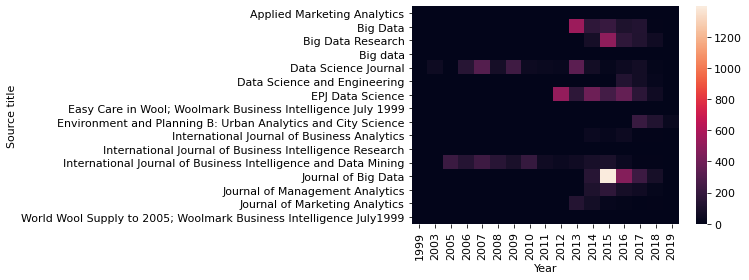

In [78]:
import seaborn as sns
sns.heatmap(df3.fillna(0))

In [108]:
##
#Los ejes para la gráfica deben ser campos en el Dataframe

df = papers.groupby(["Source title", "Year"], as_index = False).sum()[["Source title", "Year", "Cited by"]]
df

,Source title,Year,Cited by
0,Applied Marketing Analytics,2018,2.0
1,Applied Marketing Analytics,2019,0.0
2,Big Data,2013,543.0
3,Big Data,2014,170.0
4,Big Data,2015,203.0
...,...,...,...
84,Journal of Marketing Analytics,2016,12.0
85,Journal of Marketing Analytics,2017,5.0
86,Journal of Marketing Analytics,2018,7.0
87,Journal of Marketing Analytics,2019,0.0


C:\Users\ofaa\anaconda3\lib\site-packages\seaborn\axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


(array([1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. ,
        2017.5, 2020. ]),
 <a list of 10 Text major ticklabel objects>)

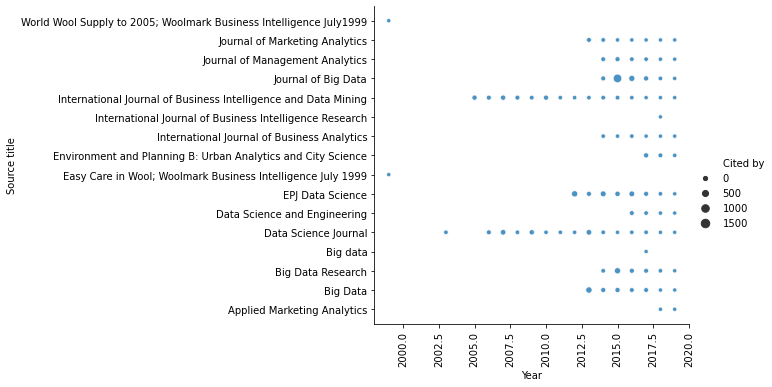

In [121]:
import seaborn as sns

%matplotlib inline
# fig = plt.figure(figsize = (5, 5))
# ax = fig.subplots()
# ax.tick_params(axis ="x", rotation = 90)
sns.relplot(
    x = "Year",
    y = "Source title",
    size = "Cited by",
    alpha = 0.8,
    palette = "viridis",
    data = df
    )
plt.xticks(rotation=90)


In [126]:
## Usando altair

alt.Chart(df).mark_circle().encode(
    alt.X(
        "Year:Q", scale = alt.Scale(domain = (2000, 2019)), axis = alt.Axis(labelAngle=270)),
    alt.Y("Source title:N"),
    size = "Cited by",
    color = "Cited by")

alt.Chart(...)

In [151]:
#Personalización

def bubble(
    X,
    darkness=None,
    figsize=(6, 6),
    cmap="Greys",
    grid_lw=1.0,
    grid_c="gray",
    grid_ls=":",
    fontsize=11,
    **kwargs,
):
    matplotlib.rc("font", size=fontsize)
    fig = plt.Figure(figsize=figsize)
    ax = fig.subplots()
    cmap = plt.cm.get_cmap(cmap)

    x = X.copy()

    size_max = x.max().max()
    size_min = x.min().min()

    if darkness is None:
        darkness = x
    darkness = darkness.loc[:, x.columns]

    color_max = darkness.max().max()
    color_min = darkness.min().min()

    for idx, row in enumerate(x.index.tolist()):

        sizes = [
            150 + 1000 * (w - size_min) / (size_max - size_min) if w != 0 else 0
            for w in x.loc[row, :]
        ]

        colors = [
            cmap(0.2 + 0.8 * (w - color_min) / (color_max - color_min))
            for w in darkness.loc[row, :]
        ]

        #  return range(len(x.columns)), [idx] * len(x.columns)

        ax.scatter(
            list(range(len(x.columns))),
            [idx] * len(x.columns),
            marker="o",
            s=sizes,
            alpha=1.0,
            c=colors,
            edgecolors="k",
            zorder=11,
            #  **kwargs,
        )

    for idx, row in enumerate(x.iterrows()):
        ax.hlines(
            idx, -1, len(x.columns), linewidth=grid_lw, color=grid_c, linestyle=grid_ls,
        )

    for idx, col in enumerate(x.columns):
        ax.vlines(
            idx, -1, len(x.index), linewidth=grid_lw, color=grid_c, linestyle=grid_ls,
        )

    mean_color = 0.5 * (color_min + color_max)
    for idx_col, col in enumerate(x.columns):
        for idx_row, row in enumerate(x.index):

            if x[col][row] != 0:
                if darkness[col][row] >= 0.8 * mean_color:
                    text_color = "w"
                else:
                    text_color = "k"

                ax.text(
                    idx_col,
                    idx_row,
                    "{}".format(x[col][row])
                    if x[col][row].dtype == "int64"
                    else "{:.2f}".format(x[col][row]),
                    va="center",
                    ha="center",
                    zorder=12,
                    color=text_color,
                )

    ax.set_aspect("equal")

    ax.set_xlim(-1, len(x.columns))
    ax.set_ylim(-1, len(x.index) + 1)

    ax.set_xticks(np.arange(len(x.columns)))
    ax.set_xticklabels(x.columns)
    ax.tick_params(axis="x", labelrotation=90)
    ax.xaxis.tick_top()

    ax.invert_yaxis()
    ax.set_yticks(np.arange(len(x.index)))
    ax.set_yticklabels(x.index)

    for x in ["top", "right", "left", "bottom"]:
        ax.spines[x].set_visible(False)

    fig.set_tight_layout(True)

    return fig

In [152]:
df4 = pd.pivot_table(
    df, values = "Cited by", index = "Year", columns = "Source title", fill_value = 0)

df4 = df4.T

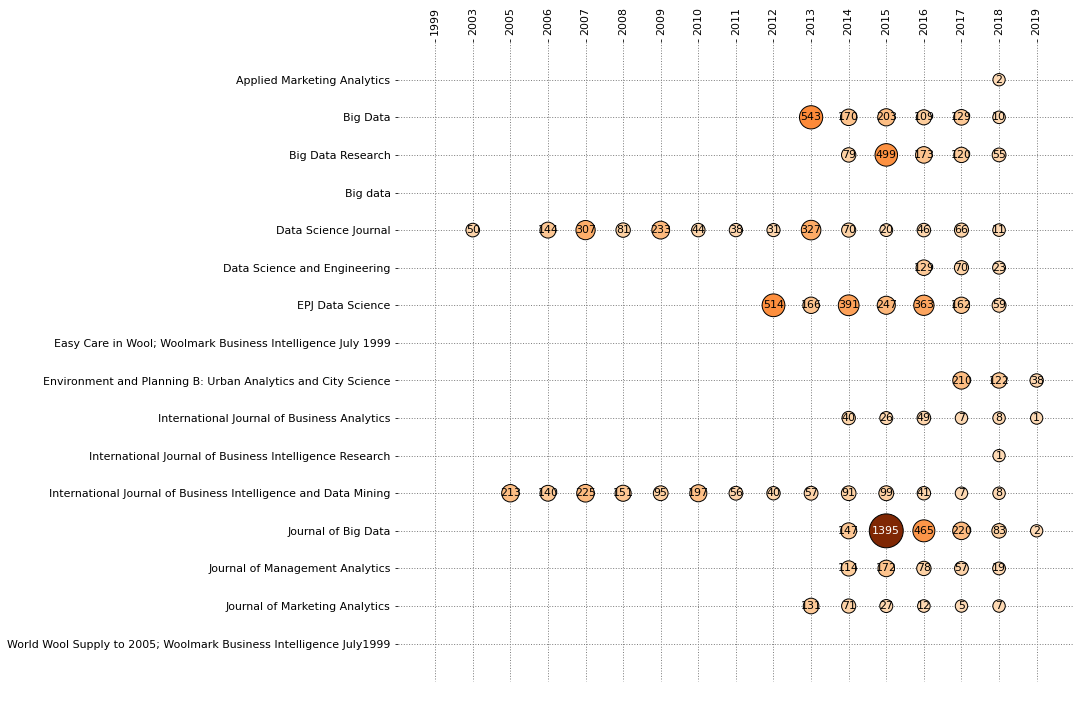

In [153]:
bubble(df4, darkness = None, figsize = (15, 15), cmap = "Oranges")

### Palabras claves más frecuentes

In [158]:
## 1. Elimiar los registros con un valor NaN

words = papers["Author Keywords"].dropna()
words.head()

0    Geo-location data; Human mobility; Resilience;...
1    Language analysis; LIWC; Moral foundations the...
2    Gravity model; Media ecosystem; News spreading...
3    Centrality measures; Community Structure; Infl...
4    Cholesterol; Diabetes; Digital purchase record...
Name: Author Keywords, dtype: object

In [159]:
## 2. Partir las cadenas por ';'

words = words.map(lambda w: w.split(';'))
words.head()

0    [Geo-location data,  Human mobility,  Resilien...
1    [Language analysis,  LIWC,  Moral foundations ...
2    [Gravity model,  Media ecosystem,  News spread...
3    [Centrality measures,  Community Structure,  I...
4    [Cholesterol,  Diabetes,  Digital purchase rec...
Name: Author Keywords, dtype: object

In [161]:
## 3. Elimina los espacios en blanco al principio y 
# al final de cada palabra clave y convertir la cadena
# en minúsculas

words = words.map(lambda w: [p.strip().lower() for p in w])
words.head()

0    [geo-location data, human mobility, resilience...
1    [language analysis, liwc, moral foundations th...
2    [gravity model, media ecosystem, news spreadin...
3    [centrality measures, community structure, inf...
4    [cholesterol, diabetes, digital purchase recor...
Name: Author Keywords, dtype: object

In [164]:
##4. Generación de un registro por palabra clave

words = words.explode()

words.head()

0    geo-location data
0       human mobility
0           resilience
0         social media
1    language analysis
Name: Author Keywords, dtype: object

In [165]:
##5. Conteo de palabras clave,. palabras clave como indices

words = words.value_counts()
words

big data                         167
data mining                      134
machine learning                  57
clustering                        41
big data analytics                37
                                ... 
materials description systems      1
fractal dimension                  1
function agent                     1
digital reading room               1
philosophy                         1
Name: Author Keywords, Length: 6368, dtype: int64

In [166]:
# Palabras más usadas

words = words.sort_values(ascending = False)
words.head(10)

big data                 167
data mining              134
machine learning          57
clustering                41
big data analytics        37
classification            33
business intelligence     31
metadata                  30
social media              29
mapreduce                 26
Name: Author Keywords, dtype: int64

In [167]:
## Vamos a usar Altair, pero primero convertiremos esta pd.Series
# en un pd.DataFrame
words = pd.DataFrame(words)
words

,Author Keywords
big data,167
data mining,134
machine learning,57
clustering,41
big data analytics,37
...,...
context awareness,1
indoor space,1
energy simulation,1
green information systems,1


In [168]:
## reseteamos el indice

words = words.reset_index()
words

,index,Author Keywords
0,big data,167
1,data mining,134
2,machine learning,57
3,clustering,41
4,big data analytics,37
...,...,...
6363,context awareness,1
6364,indoor space,1
6365,energy simulation,1
6366,green information systems,1


In [169]:
alt.Chart(words[0:20]).mark_bar().encode(
    x = "Author Keywords:Q",
    y = alt.Y("index:N",
             sort = alt.EncodingSortField(field="index:Q")),
    color = "Author Keywords:Q")

alt.Chart(...)

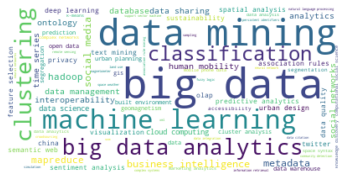

In [181]:
## Wordcloud

!pip3 install wordcloud
from wordcloud import ImageColorGenerator, WordCloud

words_dic = {key: value for key, value in zip(words["index"], words["Author Keywords"])}

wordcloud = WordCloud(
    max_font_size = 50, max_words = 100, background_color = "white").generate_from_frequencies(words_dic)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###  Contribuciones por país de origen

In [201]:
##1. Borrar NA's

affiliations = papers["Affiliations"].dropna()
affiliations[0] #Los paises se encuentran al final.

'Department of Civil, Environmental, and Construction Engineering, University of Central Florida, Orlando, United States; Media Laboratory, Massachusetts Institute of Technology, Cambridge, United States'

In [205]:
##2. Obtención de afiliadción por autor

affiliations = affiliations.map(lambda w: w.split(";"))


In [206]:
##3. Extracción del país

affiliations = affiliations.map(lambda w:[x.split(",")[-1].strip() for x in w])

In [200]:
affiliations

0                          [United States, United States]
1       [United States, Qatar, United States, United S...
2                          [Germany, Chile, Chile, Italy]
3                               [Morocco, France, France]
4       [United Kingdom, Italy, United Kingdom, United...
                              ...                        
1895                                             [Poland]
1896                                             [Israel]
1897                                             [France]
1898                             [Netherlands, Australia]
1899                                   [Germany, Germany]
Name: Affiliations, Length: 1889, dtype: object

In [207]:
affiliations = affiliations.explode()
affiliations

0       United States
0       United States
1       United States
1               Qatar
1       United States
            ...      
1897           France
1898      Netherlands
1898        Australia
1899          Germany
1899          Germany
Name: Affiliations, Length: 3963, dtype: object

In [208]:
affiliations = affiliations.value_counts()
affiliations

United States                           1089
China                                    457
India                                    295
United Kingdom                           250
Japan                                    239
                                        ... 
French Polynesia                           1
CAS                                        1
RTL â RTL                                1
Thinghua University                        1
Department of Information Management       1
Name: Affiliations, Length: 101, dtype: int64

In [209]:
#
# 7.-- Worldmap
#
!curl -0 https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/worldmap.data > worldmap.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  361k  100  361k    0     0   675k      0 --:--:-- --:--:-- --:--:--  675k


In [213]:
import matplotlib
import json
def worldmap(
    x, cmap="Pastel2", figsize=(6, 6), legend=True, fontsize=11, *args, **kwargs,
):

    matplotlib.rc("font", size=fontsize)
    fig = plt.Figure(figsize=figsize)
    ax = fig.subplots()
    cmap = plt.cm.get_cmap(cmap)

    df = x.to_frame()

    df["color"] = x.map(lambda w: 0.1 + 0.9 * (w - x.min()) / (x.max() - x.min()))

    with open("worldmap.data", "r") as f:
        countries = json.load(f)

    for country in countries.keys():
        data = countries[country]
        for item in data:
            ax.plot(item[0], item[1], "-k", linewidth=0.5)
            if country in x.index.tolist():
                ax.fill(item[0], item[1], color=cmap(df.color[country]))
    #
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xleft = xmax - 0.02 * (xmax - xmin)
    xright = xmax
    xbar = np.linspace(xleft, xright, 10)
    ybar = np.linspace(ymin, ymin + (ymax - ymin), 100)
    xv, yv = np.meshgrid(xbar, ybar)
    z = yv / (ymax - ymin) - ymin
    ax.pcolormesh(xv, yv, z, cmap=cmap)
    #
    pos = np.linspace(ymin, ymin + (ymax - ymin), 11)
    value = [round(x.min() + (x.max() - x.min()) * i / 10, 0) for i in range(11)]
    for i in range(11):
        ax.text(
            xright + 0.4 * (xright - xleft),
            pos[i],
            str(int(value[i])),
            ha="left",
            va="center",
        )

    ax.plot(
        [xleft - 0.1 * (xright - xleft), xleft - 0.1 * (xright - xleft)],
        [ymin, ymax],
        color="gray",
        linewidth=1,
    )
    for i in range(11):
        ax.plot(
            [xleft - 0.0 * (xright - xleft), xright],
            [pos[i], pos[i]],
            linewidth=2.0,
            color=cmap((11 - i) / 11),
        )

    ax.set_aspect("equal")
    ax.axis("on")
    ax.set_xticks([])
    ax.set_yticks([])

    ax.spines["bottom"].set_color("gray")
    ax.spines["top"].set_color("gray")
    ax.spines["right"].set_color("gray")
    ax.spines["left"].set_color("gray")

    fig.set_tight_layout(True)

    return fig

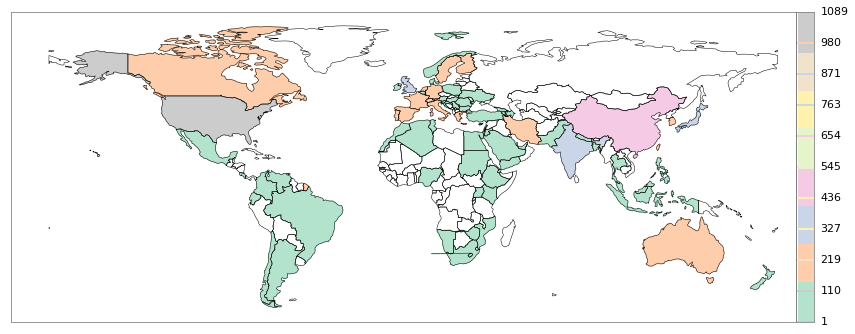

In [214]:
worldmap(affiliations, figsize=(12, 8))